<a href="https://colab.research.google.com/github/Moneycodin/No-show-medical-appointment/blob/main/No_show_appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87     17715
           1       0.39      0.25      0.30      4391

    accuracy                           0.77     22106
   macro avg       0.61      0.58      0.59     22106
weighted avg       0.74      0.77      0.75     22106

Confusion Matrix:
 [[16034  1681]
 [ 3300  1091]]
ROC-AUC Score: 0.7123675148786939


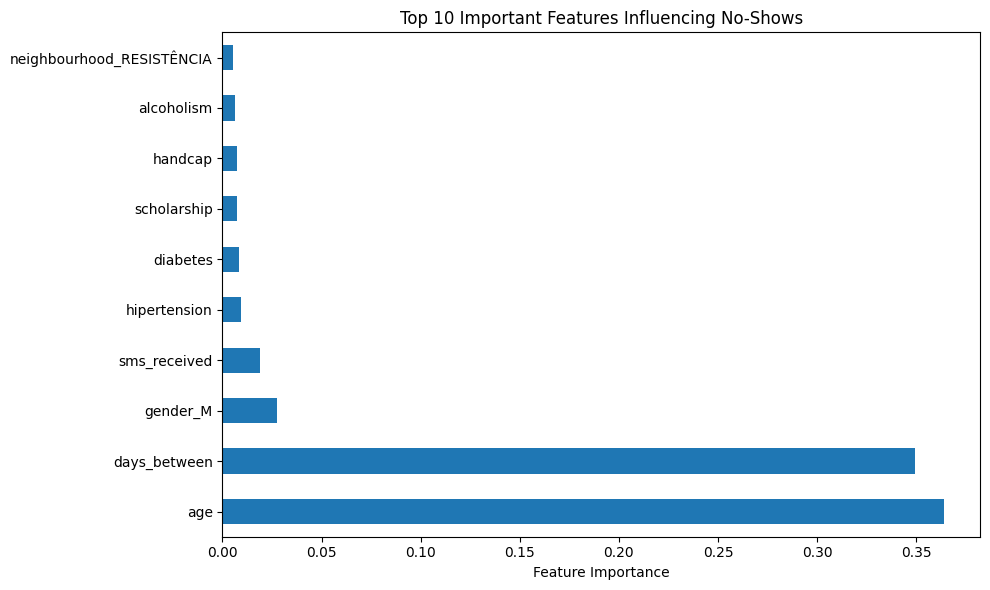

In [8]:
# Project: Predicting Missed Appointments in LTPAC
# Dataset: https://www.kaggle.com/datasets/joniarroba/noshowappointments

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
# Update the file path to the correct location of the dataset
df = pd.read_csv("/content/sample_data/KaggleV2-May-2016.csv")
df.columns = df.columns.str.lower().str.strip()

# Clean and preprocess
df = df[df['age'] >= 0]
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['days_between'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Correct the column name from 'no_show' to 'no-show'
df['no-show'] = df['no-show'].map({'No': 0, 'Yes': 1})
df = df.drop(['patientid', 'appointmentid'], axis=1)

# Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'neighbourhood'], drop_first=True)

# Prepare features and target
X = df.drop(['no-show', 'scheduledday', 'appointmentday'], axis=1)
y = df['no-show']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances[:10].plot(kind='barh')
plt.title("Top 10 Important Features Influencing No-Shows")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()